In [2]:
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX.csv


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [98]:
df=pd.read_csv('NFLX.csv')
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500


In [99]:
df.shape

(1009, 7)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [101]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [102]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['day_of_week']=df['Date'].dt.dayofweek
df=df.sort_values(by='Date')
df=df.reset_index(drop=True)

In [103]:
a=df[df['Close']!=df['Adj Close']]
a

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week


In [104]:
df.drop(['Adj Close'],inplace=True,axis='columns')

In [105]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,year,month,day,day_of_week
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,2022,2,2,2
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,2022,2,3,3
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,7782400,2022,2,4,4


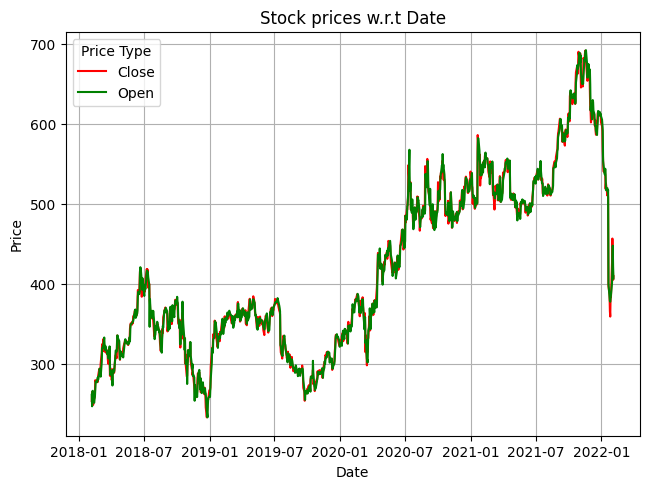

In [109]:
plt.plot(df['Date'],df['Close'],label='Close',color='red')
plt.plot(df['Date'],df['Open'],label='Open',color='green')
plt.title('Stock prices w.r.t Date')
plt.legend(title='Price Type')
plt.grid()
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [47]:
df.drop(['Date'],inplace=True,axis='columns')

In [76]:
X=df.drop(df[['Close','Open']],axis='columns')
y=df[['Open','Close']]

In [77]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=43)

In [79]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred=model.predict(X_test)

In [81]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2score}')

Mean Absolute Error: 3.4749058358112848
Mean Squared Error: 20.727621651084984
r2 score: 0.9982769103683503


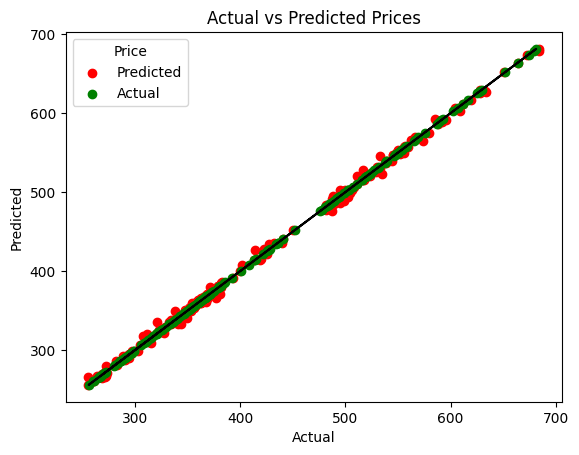

In [112]:
plt.scatter(y_pred[:,1],y_test['Close'].values,label='Predicted',color='red')
plt.scatter(y_test['Close'].values,y_test['Close'].values,label='Actual',color='green')
plt.plot(y_test['Close'].values,y_test['Close'].values,color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.legend(title='Price')